<a href="https://colab.research.google.com/github/OZambranoE/Clasificacion-de-Rocas/blob/main/Clasificacion_de_Rocas_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report

In [2]:
filename = "/content/drive/MyDrive/Codificación de Dojo/Proyecto2/rocas.csv"
df = pd.read_csv(filename)

df.head()

,Nombre,SiO2,Al2O3,FeOT,CaO,MgO,Na2O,K2O,MnO,TiO
0,Peridotita,45.16,1.56,8.79,0.97,44.47,0.10,0.02,0.13,0.10
1,Peridotita,45.97,2.94,8.90,2.83,39.89,0.17,0.04,0.13,0.19
2,Peridotita,46.91,3.62,8.23,2.73,39.55,0.14,0.01,0.13,0.11
3,Peridotita,44.96,2.01,9.04,1.10,43.39,0.10,0.02,0.13,0.11
4,Peridotita,45.24,0.73,7.92,0.42,46.79,0.01,0.01,0.11,0.03


In [3]:
df.shape

(10537, 10)

In [4]:
# Se exploran los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10537 entries, 0 to 10536
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  10537 non-null  object 
 1   SiO2    10537 non-null  float64
 2   Al2O3   10537 non-null  float64
 3   FeOT    10537 non-null  float64
 4   CaO     10537 non-null  float64
 5   MgO     10537 non-null  float64
 6   Na2O    10537 non-null  float64
 7   K2O     10537 non-null  float64
 8   MnO     10537 non-null  float64
 9   TiO     10537 non-null  float64
dtypes: float64(9), object(1)
memory usage: 823.3+ KB


In [5]:
# No existen valores nulos en las columnas
df.isna().sum()

Nombre    0
SiO2      0
Al2O3     0
FeOT      0
CaO       0
MgO       0
Na2O      0
K2O       0
MnO       0
TiO       0
dtype: int64

In [6]:
# Debido a la cantidad de datos, existe la posibilidad de que las filas repetidas correspondan a coincidencias en los componentes de muestras de una misma zona.
# De todos modos, considerando el universo total de los datos se proceden a eliminar estas filas
df.duplicated().sum()

50

In [7]:
# se eliminan los datos duplicados
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
# El tarjet es la columna "Nombre"
# Se puede observar que las posibilidades para la clasificacion son: Peridotita, Granodiorita y Andesita
df['Nombre'].unique()

array(['Peridotita', 'Granodiorita', 'Andesita'], dtype=object)

In [9]:
#Las graficas seran histogramas que relacionen los promedios de los componentes para cada tipo de roca.
#para esto, lo primero es hacer un groupby entre las columnas de nombre y el componente a analizar
df_SiO2 = df.groupby(['Nombre'])['SiO2'].mean()
df_SiO2

Nombre
Andesita        57.267641
Granodiorita    66.476915
Peridotita      43.415374
Name: SiO2, dtype: float64

Text(0, 0.5, 'Contenido de SiO2')

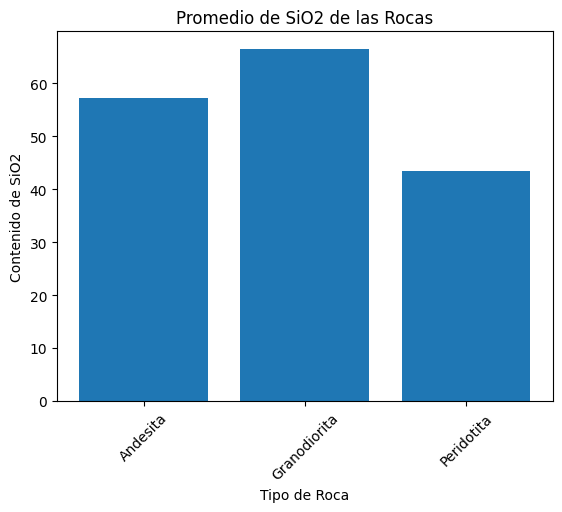

In [10]:
plt.bar(df_SiO2.index, df_SiO2.values);
plt.xticks(rotation = 45)
plt.title('Promedio de SiO2 de las Rocas')
plt.xlabel('Tipo de Roca')
plt.ylabel('Contenido de SiO2')

In [11]:
df_Al2O3 = df.groupby(['Nombre'])['Al2O3'].mean()
df_Al2O3


Nombre
Andesita        16.656845
Granodiorita    15.494511
Peridotita       2.630939
Name: Al2O3, dtype: float64

Text(0, 0.5, 'Contenido de Al2O3')

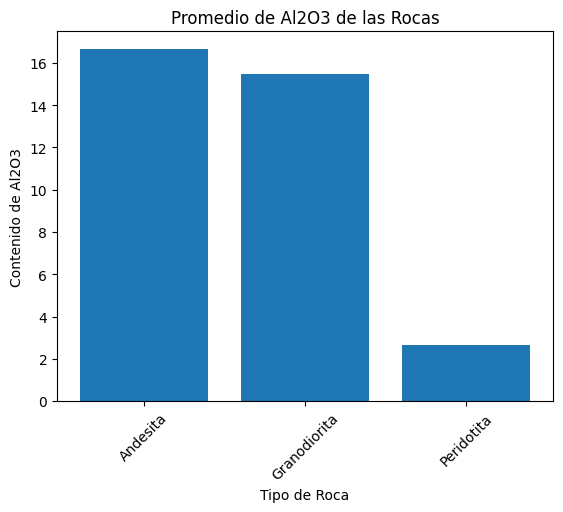

In [12]:
plt.bar(df_Al2O3.index, df_Al2O3.values);
plt.xticks(rotation = 45)
plt.title('Promedio de Al2O3 de las Rocas')
plt.xlabel('Tipo de Roca')
plt.ylabel('Contenido de Al2O3')

In [13]:
df_FeOT = df.groupby(['Nombre'])['FeOT'].mean()
df_FeOT

Nombre
Andesita        7.140108
Granodiorita    3.736835
Peridotita      8.564758
Name: FeOT, dtype: float64

Text(0, 0.5, 'Contenido de FeOT')

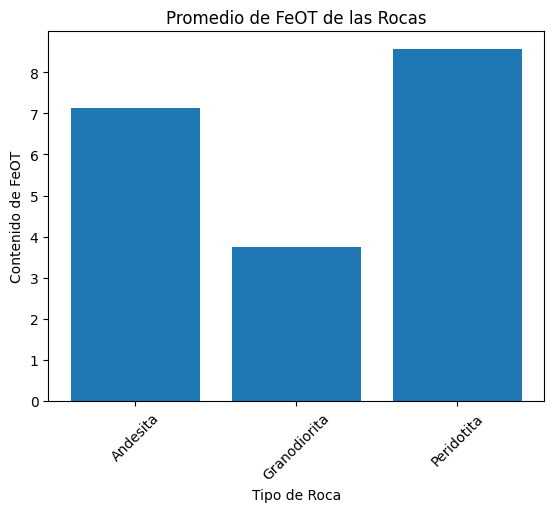

In [14]:
plt.bar(df_FeOT.index, df_FeOT.values);
plt.xticks(rotation = 45)
plt.title('Promedio de FeOT de las Rocas')
plt.xlabel('Tipo de Roca')
plt.ylabel('Contenido de FeOT')

In [15]:
df_CaO = df.groupby(['Nombre'])['CaO'].mean()
df_CaO

Nombre
Andesita        6.862926
Granodiorita    3.447065
Peridotita      2.391172
Name: CaO, dtype: float64

Text(0, 0.5, 'Contenido de CaO')

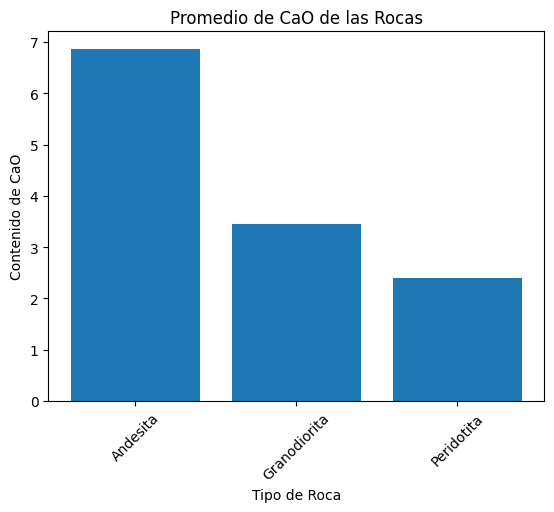

In [16]:
plt.bar(df_CaO.index, df_CaO.values);
plt.xticks(rotation = 45)
plt.title('Promedio de CaO de las Rocas')
plt.xlabel('Tipo de Roca')
plt.ylabel('Contenido de CaO')

In [17]:
df_MgO = df.groupby(['Nombre'])['MgO'].mean()
df_MgO

Nombre
Andesita         3.827119
Granodiorita     1.618371
Peridotita      39.636627
Name: MgO, dtype: float64

Text(0, 0.5, 'Contenido de MgO')

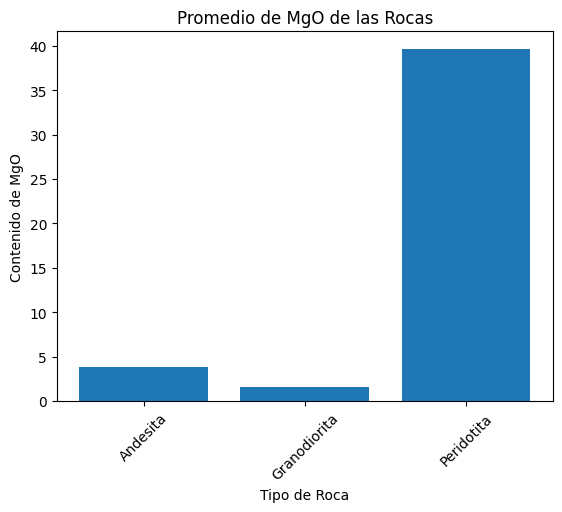

In [18]:
plt.bar(df_MgO.index, df_MgO.values);
plt.xticks(rotation = 45)
plt.title('Promedio de MgO de las Rocas')
plt.xlabel('Tipo de Roca')
plt.ylabel('Contenido de MgO')

In [19]:
df_Na2O = df.groupby(['Nombre'])['Na2O'].mean()
df_Na2O

Nombre
Andesita        3.491932
Granodiorita    3.726760
Peridotita      0.226822
Name: Na2O, dtype: float64

Text(0, 0.5, 'Contenido de Na2O')

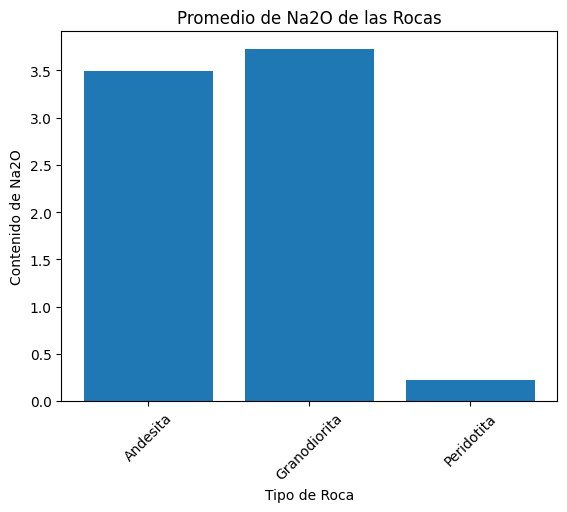

In [20]:
plt.bar(df_Na2O.index, df_Na2O.values);
plt.xticks(rotation = 45)
plt.title('Promedio de Na2O de las Rocas')
plt.xlabel('Tipo de Roca')
plt.ylabel('Contenido de Na2O')

In [21]:
df_K2O = df.groupby(['Nombre'])['K2O'].mean()
df_K2O

Nombre
Andesita        1.718199
Granodiorita    2.983436
Peridotita      0.117431
Name: K2O, dtype: float64

Text(0, 0.5, 'Contenido de K2O')

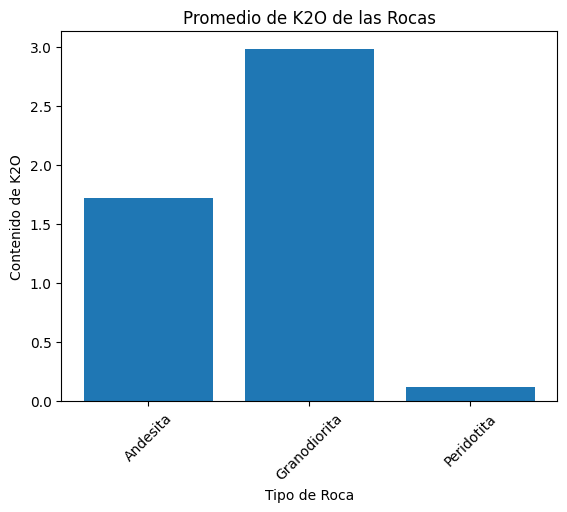

In [22]:
plt.bar(df_K2O.index, df_K2O.values);
plt.xticks(rotation = 45)
plt.title('Promedio de K2O de las Rocas')
plt.xlabel('Tipo de Roca')
plt.ylabel('Contenido de K2O')

In [23]:
df_MnO = df.groupby(['Nombre'])['MnO'].mean()
df_MnO

Nombre
Andesita        0.143841
Granodiorita    0.078363
Peridotita      0.138131
Name: MnO, dtype: float64

Text(0, 0.5, 'Contenido de MnO')

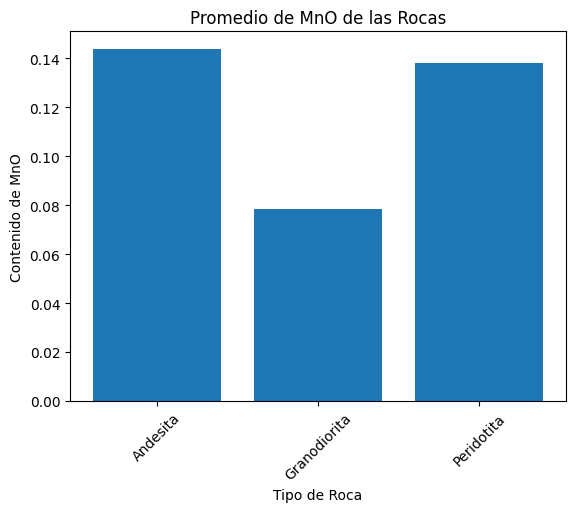

In [24]:
plt.bar(df_MnO.index, df_MnO.values);
plt.xticks(rotation = 45)
plt.title('Promedio de MnO de las Rocas')
plt.xlabel('Tipo de Roca')
plt.ylabel('Contenido de MnO')

In [25]:
df_TiO = df.groupby(['Nombre'])['TiO'].mean()
df_TiO

Nombre
Andesita        0.908743
Granodiorita    0.517581
Peridotita      0.186882
Name: TiO, dtype: float64

Text(0, 0.5, 'Contenido de TiO')

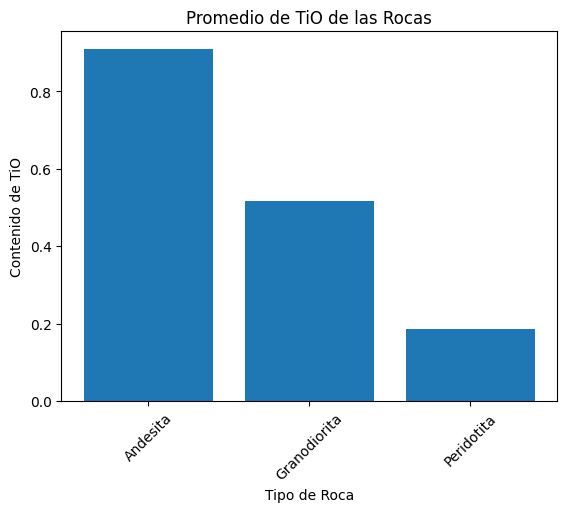

In [26]:
plt.bar(df_TiO.index, df_TiO.values);
plt.xticks(rotation = 45)
plt.title('Promedio de TiO de las Rocas')
plt.xlabel('Tipo de Roca')
plt.ylabel('Contenido de TiO')

In [27]:
# Antes de definir matriz de características, vector objetivo y modelo de validacion, se debe aplicar un OHE a la columna objetivo, ya que las 3 tienen el mismo peso
from sklearn.preprocessing import OneHotEncoder

In [28]:
# Crea una instancia de OneHotEncoder
encoder = OneHotEncoder()

# Ajusta y transforma los datos de la columna "Nombre"
nombre_encoded = encoder.fit_transform(df[["Nombre"]])
nombre_encoded

<10487x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10487 stored elements in Compressed Sparse Row format>

In [29]:
# Para obtener una representación de matriz densa
nombre_encoded_dense = nombre_encoded.toarray()
nombre_encoded_dense

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [30]:
# Crea un DataFrame con la matriz codificada one-hot
nombre_encoded_df = pd.DataFrame(nombre_encoded_dense, columns=encoder.get_feature_names_out(["Nombre"]))

# reiniciar los indices
df.reset_index(drop=True, inplace=True)
nombre_encoded_df.reset_index(drop=True, inplace=True)

# Concatena el DataFrame codificado con el resto de las columnas numéricas en df
df = pd.concat([df.drop("Nombre", axis=1), nombre_encoded_df], axis=1)
df

,SiO2,Al2O3,FeOT,CaO,MgO,Na2O,K2O,MnO,TiO,Nombre_Andesita,Nombre_Granodiorita,Nombre_Peridotita
0,45.1600,1.5600,8.79,0.9700,44.4700,0.1000,0.0200,0.1300,0.1000,0.0,0.0,1.0
1,45.9700,2.9400,8.90,2.8300,39.8900,0.1700,0.0400,0.1300,0.1900,0.0,0.0,1.0
2,46.9100,3.6200,8.23,2.7300,39.5500,0.1400,0.0100,0.1300,0.1100,0.0,0.0,1.0
3,44.9600,2.0100,9.04,1.1000,43.3900,0.1000,0.0200,0.1300,0.1100,0.0,0.0,1.0
4,45.2400,0.7300,7.92,0.4200,46.7900,0.0100,0.0100,0.1100,0.0300,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10482,57.0738,18.3259,7.39,7.9486,4.1057,2.9480,1.0764,0.1504,0.7819,1.0,0.0,0.0
10483,56.8466,18.4544,7.44,8.1001,4.1758,2.8861,1.0419,0.1505,0.7956,1.0,0.0,0.0
10484,57.4231,18.1385,7.08,7.6375,3.8100,2.9543,1.1174,0.1468,0.7496,1.0,0.0,0.0
10485,57.3809,18.2056,7.05,7.7114,3.8540,2.9675,1.0953,0.1470,0.7481,1.0,0.0,0.0


In [31]:
# se definen matriz de características, vector objetivo y modelo de validacion
y = df[['Nombre_Andesita', 'Nombre_Granodiorita', 'Nombre_Peridotita']]
X = df.drop(columns = ['Nombre_Andesita', 'Nombre_Granodiorita', 'Nombre_Peridotita'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Árboles de clasificación

In [32]:
# se instancia el modelo
# se instancia el modelo, despues de probar con distintas profundidades, 5 es la que da mejor rendimiento
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=5)

In [33]:
# se entrena el modelo
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [34]:
# se predicen las etiquetas de los datos nuevos
dec_tree.predict(X_test)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [35]:
# se evalua el modelo
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score.round(5))
print(test_score.round(5))

0.9424
0.93326


In [36]:
predictions1 = dec_tree.predict(X_test)

In [38]:
report1 = classification_report(y_test, predictions1)
print(report1)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1458
           1       0.94      0.83      0.88       743
           2       0.99      0.99      0.99       421

   micro avg       0.94      0.93      0.93      2622
   macro avg       0.95      0.93      0.94      2622
weighted avg       0.94      0.93      0.93      2622
 samples avg       0.93      0.93      0.93      2622



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo KNN

In [39]:
# Es necesario escalar los datos
scaler = StandardScaler()

In [40]:
# se instancia el modelo con n_neighbors = 3, despues de probar varios 3 es el con mejor rendimiento
knn = KNeighborsClassifier(n_neighbors= 3)

In [41]:
# se crea el pipeline con el escalamiento y el entrenamiento
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [42]:
predictions = knn_pipe.predict(X_test)
predictions

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [43]:
# se evalua el modelo
acc_score = knn_pipe.score(X_test, y_test)
acc_score.round(5)

0.95195

In [44]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1458
           1       0.93      0.92      0.92       743
           2       1.00      0.97      0.98       421

   micro avg       0.95      0.95      0.95      2622
   macro avg       0.96      0.95      0.95      2622
weighted avg       0.95      0.95      0.95      2622
 samples avg       0.95      0.95      0.95      2622



Modelo Neuronal

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [55]:
#Queremos escalar nuestros datos cuando se utilice las redes neuronales. Esto puede ayudar al modelo ajustarse más rápido y encontrar la mejor solución.
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# Paso 1: definir nuestra estructura de red
# Lo primero que debemos hacer es definir cuántas características tenemos en nuestros datos X.
input_shape = X_train.shape[1]
input_shape

9

In [57]:
# Utilizaremos un modelo secuencial
model = Sequential()

In [58]:
# Primero se agregan las capas ocultas
model.add(Dense(64, activation='relu', input_shape=(9,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [59]:
# Paso 2: Compilar y agregar metricas
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
# Paso 3: ajustar nuestro modelo
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
246/246 [==============================] - 2s 3ms/step - loss: 0.3279 - accuracy: 0.9186 - val_loss: 0.2085 - val_accuracy: 0.9382
Epoch 2/10
246/246 [==============================] - 1s 2ms/step - loss: 0.2152 - accuracy: 0.9324 - val_loss: 0.1933 - val_accuracy: 0.9367
Epoch 3/10
246/246 [==============================] - 1s 3ms/step - loss: 0.2000 - accuracy: 0.9352 - val_loss: 0.1810 - val_accuracy: 0.9401
Epoch 4/10
246/246 [==============================] - 1s 2ms/step - loss: 0.1902 - accuracy: 0.9367 - val_loss: 0.1812 - val_accuracy: 0.9409
Epoch 5/10
246/246 [==============================] - 1s 3ms/step - loss: 0.1843 - accuracy: 0.9372 - val_loss: 0.1676 - val_accuracy: 0.9447
Epoch 6/10
246/246 [==============================] - 1s 4ms/step - loss: 0.1774 - accuracy: 0.9381 - val_loss: 0.1647 - val_accuracy: 0.9455
Epoch 7/10
246/246 [==============================] - 1s 4ms/step - loss: 0.1729 - accuracy: 0.9392 - val_loss: 0.1619 - val_accuracy: 0.9458
Epoch 

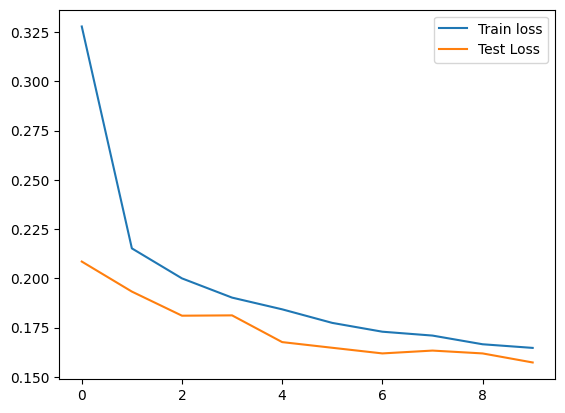

In [61]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

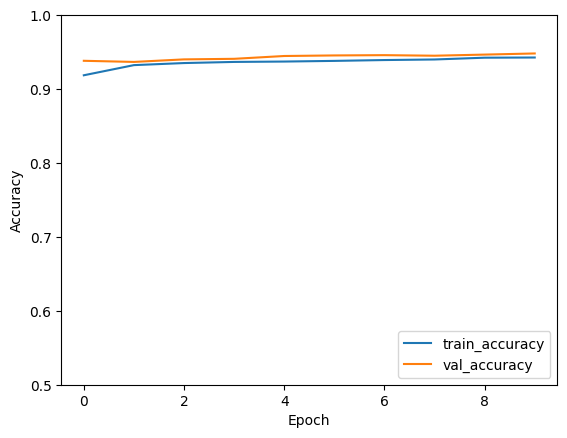

In [62]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Regresion Logistica

In [67]:
# Para la regresion logistica hay problemas con la demensionalidad de la columna tarjet. Asi que importaré la base de datos nuevamente para tenerla limpia
filename = "/content/drive/MyDrive/Codificación de Dojo/Proyecto2/rocas.csv"
df = pd.read_csv(filename)

df.head()

,Nombre,SiO2,Al2O3,FeOT,CaO,MgO,Na2O,K2O,MnO,TiO
0,Peridotita,45.16,1.56,8.79,0.97,44.47,0.10,0.02,0.13,0.10
1,Peridotita,45.97,2.94,8.90,2.83,39.89,0.17,0.04,0.13,0.19
2,Peridotita,46.91,3.62,8.23,2.73,39.55,0.14,0.01,0.13,0.11
3,Peridotita,44.96,2.01,9.04,1.10,43.39,0.10,0.02,0.13,0.11
4,Peridotita,45.24,0.73,7.92,0.42,46.79,0.01,0.01,0.11,0.03


In [70]:
# Separar características (X) y variable objetivo (y)
X = df.drop('Nombre', axis=1)
y = df['Nombre']

# Codificar las etiquetas de clase a valores numéricos enteros
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Crear un clasificador de regresión logística con regularización L2 y más iteraciones
clf = LogisticRegression(penalty='l2', max_iter=1000)

# Ajustar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Evaluar el modelo con los datos de prueba
accuracy = clf.score(X_test, y_test)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.9321631878557874


In [71]:
predictions_clf = clf.predict(X_test)

In [72]:
report = classification_report(y_test, predictions_clf)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1187
           1       0.91      0.85      0.88       601
           2       0.99      0.99      0.99       320

    accuracy                           0.93      2108
   macro avg       0.94      0.93      0.94      2108
weighted avg       0.93      0.93      0.93      2108



<Axes: >

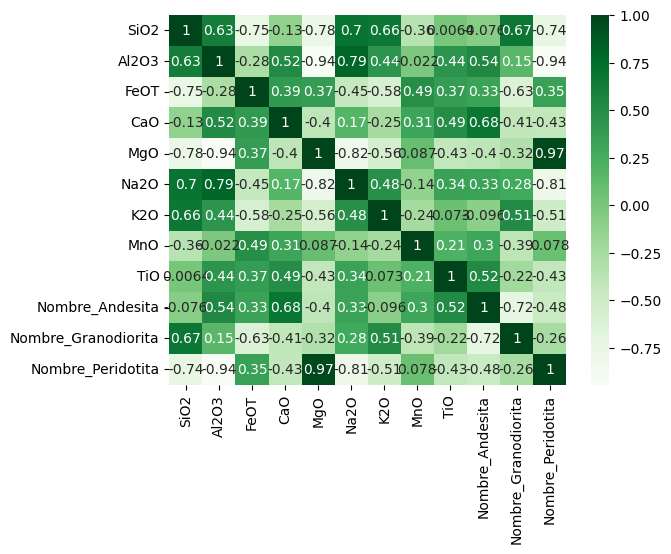

In [51]:
#Mapa de calor para observar correlaciones
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)